In [2]:
pip install ucimlrepo

In [3]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
bank_marketing = fetch_ucirepo(id=222)

# data (as pandas dataframes)
X = bank_marketing.data.features
y = bank_marketing.data.targets

# metadata
print(bank_marketing.metadata)

# variable information
print(bank_marketing.variables)


{'uci_id': 222, 'name': 'Bank Marketing', 'repository_url': 'https://archive.ics.uci.edu/dataset/222/bank+marketing', 'data_url': 'https://archive.ics.uci.edu/static/public/222/data.csv', 'abstract': 'The data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal is to predict if the client will subscribe a term deposit (variable y).', 'area': 'Business', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 45211, 'num_features': 16, 'feature_types': ['Categorical', 'Integer'], 'demographics': ['Age', 'Occupation', 'Marital Status', 'Education Level'], 'target_col': ['y'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 2014, 'last_updated': 'Fri Aug 18 2023', 'dataset_doi': '10.24432/C5K306', 'creators': ['S. Moro', 'P. Rita', 'P. Cortez'], 'intro_paper': {'ID': 277, 'type': 'NATIVE', 'title': 'A data-driven approach to predict the s

In [4]:
# Checking for duplicate rows in the 'bank.csv' dataset again to align with the user's query
duplicate_rows_X = X.duplicated()
duplicate_count_X = duplicate_rows_X.sum()

duplicate_count_X


0

In [5]:
import pandas as pd
# Convert X to a DataFrame (if it's not already one)
X = pd.DataFrame(X)
print(X)

       age           job   marital  education default  balance housing loan  \
0       58    management   married   tertiary      no     2143     yes   no   
1       44    technician    single  secondary      no       29     yes   no   
2       33  entrepreneur   married  secondary      no        2     yes  yes   
3       47   blue-collar   married        NaN      no     1506     yes   no   
4       33           NaN    single        NaN      no        1      no   no   
...    ...           ...       ...        ...     ...      ...     ...  ...   
45206   51    technician   married   tertiary      no      825      no   no   
45207   71       retired  divorced    primary      no     1729      no   no   
45208   72       retired   married  secondary      no     5715      no   no   
45209   57   blue-collar   married  secondary      no      668      no   no   
45210   37  entrepreneur   married  secondary      no     2971      no   no   

         contact  day_of_week month  duration  camp

In [6]:
# Calculate the number of missing values
missing_values = X.isnull().sum()

# Calculate the percentage of missing values
missing_percentage = X.isnull().mean() * 100

# Combine both into a DataFrame for better readability
missing_summary = pd.DataFrame({
    'Missing Values': missing_values,
    'Missing Percentage (%)': missing_percentage
})

# Display the missing values and percentages for each column
print("Missing Value Summary for Each Column:")
print(missing_summary)


Missing Value Summary for Each Column:
             Missing Values  Missing Percentage (%)
age                       0                0.000000
job                     288                0.637013
marital                   0                0.000000
education              1857                4.107407
default                   0                0.000000
balance                   0                0.000000
housing                   0                0.000000
loan                      0                0.000000
contact               13020               28.798301
day_of_week               0                0.000000
month                     0                0.000000
duration                  0                0.000000
campaign                  0                0.000000
pdays                     0                0.000000
previous                  0                0.000000
poutcome              36959               81.747805


In [7]:
print(X)

       age           job   marital  education default  balance housing loan  \
0       58    management   married   tertiary      no     2143     yes   no   
1       44    technician    single  secondary      no       29     yes   no   
2       33  entrepreneur   married  secondary      no        2     yes  yes   
3       47   blue-collar   married        NaN      no     1506     yes   no   
4       33           NaN    single        NaN      no        1      no   no   
...    ...           ...       ...        ...     ...      ...     ...  ...   
45206   51    technician   married   tertiary      no      825      no   no   
45207   71       retired  divorced    primary      no     1729      no   no   
45208   72       retired   married  secondary      no     5715      no   no   
45209   57   blue-collar   married  secondary      no      668      no   no   
45210   37  entrepreneur   married  secondary      no     2971      no   no   

         contact  day_of_week month  duration  camp

In [8]:
df_cleaned = pd.DataFrame(X)

print(df_cleaned)

       age           job   marital  education default  balance housing loan  \
0       58    management   married   tertiary      no     2143     yes   no   
1       44    technician    single  secondary      no       29     yes   no   
2       33  entrepreneur   married  secondary      no        2     yes  yes   
3       47   blue-collar   married        NaN      no     1506     yes   no   
4       33           NaN    single        NaN      no        1      no   no   
...    ...           ...       ...        ...     ...      ...     ...  ...   
45206   51    technician   married   tertiary      no      825      no   no   
45207   71       retired  divorced    primary      no     1729      no   no   
45208   72       retired   married  secondary      no     5715      no   no   
45209   57   blue-collar   married  secondary      no      668      no   no   
45210   37  entrepreneur   married  secondary      no     2971      no   no   

         contact  day_of_week month  duration  camp

In [9]:
# Separate numerical and categorical columns
numerical_columns = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_columns = X.select_dtypes(include=['object']).columns.tolist()

print("Numerical Features:", numerical_columns)
print("Categorical Features:", categorical_columns)


Numerical Features: ['age', 'balance', 'day_of_week', 'duration', 'campaign', 'pdays', 'previous']
Categorical Features: ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']


In [10]:
# Add 'y' column back to df_cleaned
df_cleaned['y'] = y

# Display the updated DataFrame
print(df_cleaned.head())

   age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married        NaN      no     1506     yes   no   
4   33           NaN   single        NaN      no        1      no   no   

  contact  day_of_week month  duration  campaign  pdays  previous poutcome   y  
0     NaN            5   may       261         1     -1         0      NaN  no  
1     NaN            5   may       151         1     -1         0      NaN  no  
2     NaN            5   may        76         1     -1         0      NaN  no  
3     NaN            5   may        92         1     -1         0      NaN  no  
4     NaN            5   may       198         1     -1         0      NaN  no  


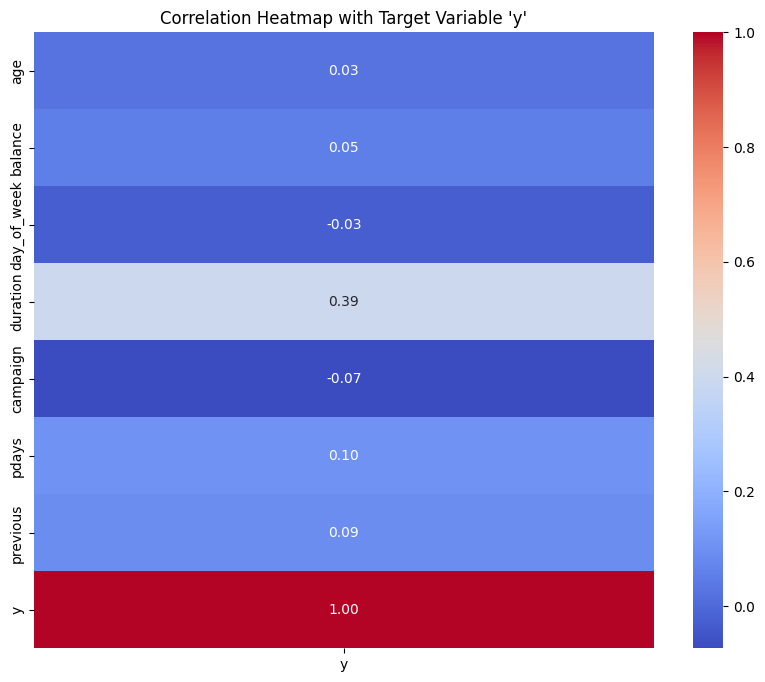

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# Ensure all columns are numeric
df_numeric = df_cleaned.select_dtypes(include=['number'])

# Add the 'y' column, ensuring it's numeric (if categorical, convert it)
df_numeric['y'] = df_cleaned['y'].apply(lambda val: 1 if val == 'yes' else 0)  # Assuming 'yes/no'

# Compute the correlation matrix
correlation_matrix = df_numeric.corr()

# Extract correlation of all columns with 'y'
target_correlation = correlation_matrix[['y']]

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(target_correlation, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap with Target Variable 'y'")
plt.show()


In [14]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import mutual_info_classif
from scipy.stats import chi2_contingency

# Define Cramér's V function
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k - 1) * (r - 1)) / (n - 1))
    rcorr = r - ((r - 1)**2) / (n - 1)
    kcorr = k - ((k - 1)**2) / (n - 1)
    return np.sqrt(phi2corr / min((kcorr - 1), (rcorr - 1)))

# ... (other parts of your code) ...

# Test for categorical columns
categorical_columns = df_cleaned.select_dtypes(include=['object']).columns

# Ensure 'y' is in df_cleaned and is categorical
if 'y' not in df_cleaned.columns:
    df_cleaned['y'] = y  # Assuming 'y' is your target variable

# Ensure 'y' is treated as categorical
df_cleaned['y'] = df_cleaned['y'].astype('object')

for col in categorical_columns:
    if col != 'y':  # Skip the target itself
        print(f"Column: {col}")
        # chi2, p = chi_square_test(col, 'y')
        # print(f"  Chi-Square: {chi2:.2f}, p-value: {p:.2e}")
        print(f"  Cramér's V: {cramers_v(df_cleaned[col], df_cleaned['y']):.2f}")  # Pass the actual Series to cramers_v
        # print(f"  Mutual Information: {mutual_info(col, 'y'):.2f}")

Column: job
  Cramér's V: 0.14
Column: marital
  Cramér's V: 0.07
Column: education
  Cramér's V: 0.07
Column: default
  Cramér's V: 0.02
Column: housing
  Cramér's V: 0.14
Column: loan
  Cramér's V: 0.07
Column: contact
  Cramér's V: 0.01
Column: month
  Cramér's V: 0.26
Column: poutcome
  Cramér's V: 0.47


In [15]:
# Drop the contact column
df_cleaned = df_cleaned.drop(columns=['contact'])

print(df_cleaned)

       age           job   marital  education default  balance housing loan  \
0       58    management   married   tertiary      no     2143     yes   no   
1       44    technician    single  secondary      no       29     yes   no   
2       33  entrepreneur   married  secondary      no        2     yes  yes   
3       47   blue-collar   married        NaN      no     1506     yes   no   
4       33           NaN    single        NaN      no        1      no   no   
...    ...           ...       ...        ...     ...      ...     ...  ...   
45206   51    technician   married   tertiary      no      825      no   no   
45207   71       retired  divorced    primary      no     1729      no   no   
45208   72       retired   married  secondary      no     5715      no   no   
45209   57   blue-collar   married  secondary      no      668      no   no   
45210   37  entrepreneur   married  secondary      no     2971      no   no   

       day_of_week month  duration  campaign  pdays

In [16]:
# Remove rows where 'education' is NaN
df_cleaned = df_cleaned.dropna(subset=['education','job'])
print(df_cleaned)

       age           job   marital  education default  balance housing loan  \
0       58    management   married   tertiary      no     2143     yes   no   
1       44    technician    single  secondary      no       29     yes   no   
2       33  entrepreneur   married  secondary      no        2     yes  yes   
5       35    management   married   tertiary      no      231     yes   no   
6       28    management    single   tertiary      no      447     yes  yes   
...    ...           ...       ...        ...     ...      ...     ...  ...   
45206   51    technician   married   tertiary      no      825      no   no   
45207   71       retired  divorced    primary      no     1729      no   no   
45208   72       retired   married  secondary      no     5715      no   no   
45209   57   blue-collar   married  secondary      no      668      no   no   
45210   37  entrepreneur   married  secondary      no     2971      no   no   

       day_of_week month  duration  campaign  pdays

In [17]:
df_cleaned['poutcome'] = df_cleaned['poutcome'].fillna('unknown')

# Verify the change
print(df_cleaned['poutcome'].value_counts())


poutcome
unknown    35286
failure     4709
other       1774
success     1424
Name: count, dtype: int64


Analyzing relationship between 'job' and 'y'...
y                no   yes
job                      
admin.         4387   613
blue-collar    8603   675
entrepreneur   1295   116
housemaid      1090   105
management     7963  1253
retired        1659   486
self-employed  1358   182
services       3654   350
student         549   226
technician     6538   817
unemployed     1076   198
Chi-Square Statistic = 772.4886316546689, p-value = 1.690329500153999e-159



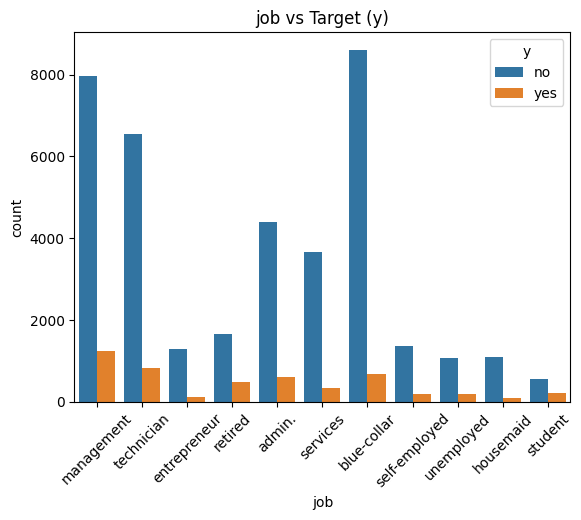

Analyzing relationship between 'marital' and 'y'...
y            no   yes
marital              
divorced   4430   598
married   23343  2603
single    10399  1820
Chi-Square Statistic = 191.58127409263932, p-value = 2.5041187079195114e-42



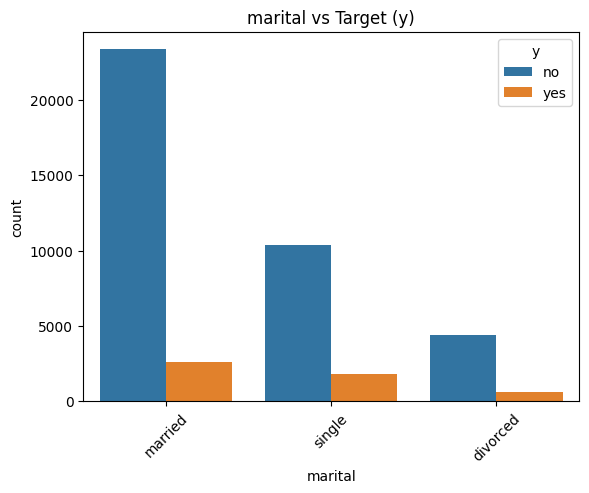

Analyzing relationship between 'education' and 'y'...
y             no   yes
education             
primary     6212   588
secondary  20690  2441
tertiary   11270  1992
Chi-Square Statistic = 233.40066357580014, p-value = 2.078212095907046e-51



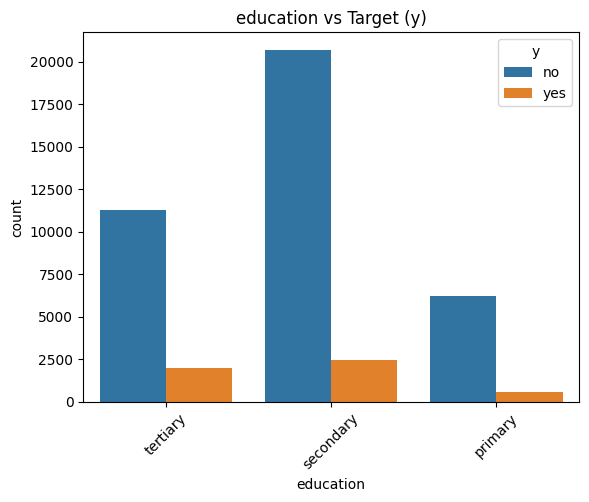

Analyzing relationship between 'default' and 'y'...
y           no   yes
default             
no       37438  4973
yes        734    48
Chi-Square Statistic = 22.79481012048514, p-value = 1.8025181186150768e-06



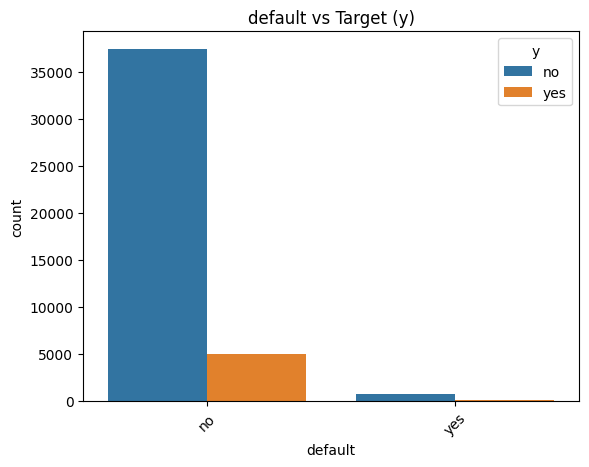

Analyzing relationship between 'housing' and 'y'...
y           no   yes
housing             
no       15754  3147
yes      22418  1874
Chi-Square Statistic = 825.2788351221966, p-value = 1.7222372972004139e-181



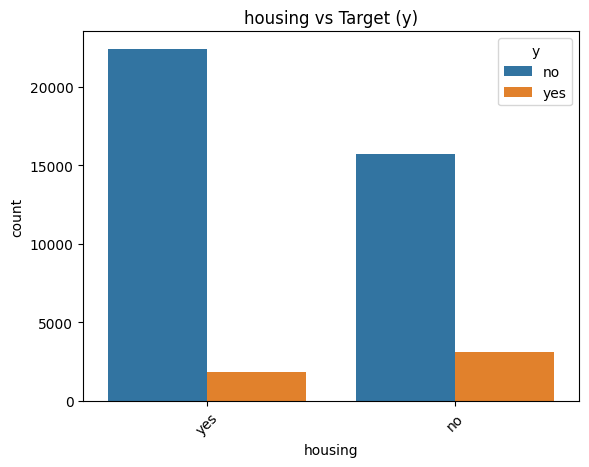

Analyzing relationship between 'loan' and 'y'...
y        no   yes
loan             
no    31538  4548
yes    6634   473
Chi-Square Statistic = 203.8861140556309, p-value = 2.9637019493258665e-46



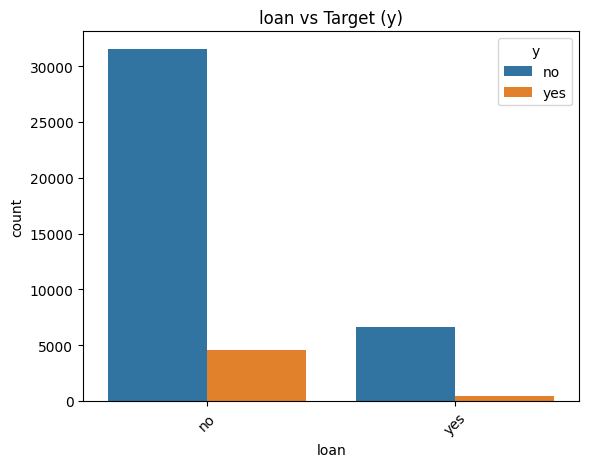

Analyzing relationship between 'month' and 'y'...
y         no  yes
month            
apr     2277  543
aug     5378  659
dec      107   93
feb     2115  418
jan     1186  132
jul     6015  586
jun     4457  523
mar      207  241
may    12304  888
nov     3452  390
oct      393  297
sep      281  251
Chi-Square Statistic = 2924.9235377219893, p-value = 0.0



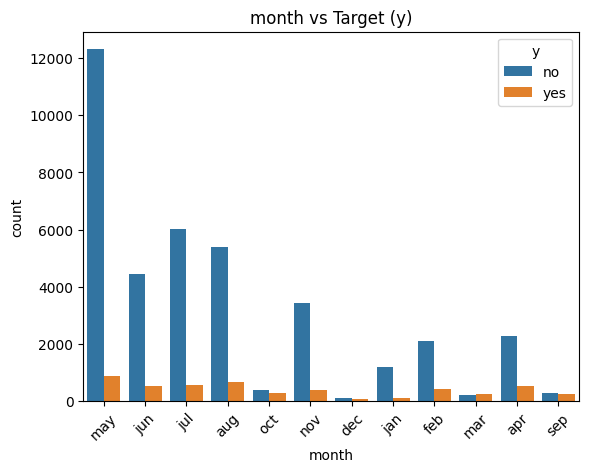

Analyzing relationship between 'poutcome' and 'y'...
y            no   yes
poutcome             
failure    4122   587
other      1481   293
success     507   917
unknown   32062  3224
Chi-Square Statistic = 4117.261328782818, p-value = 0.0



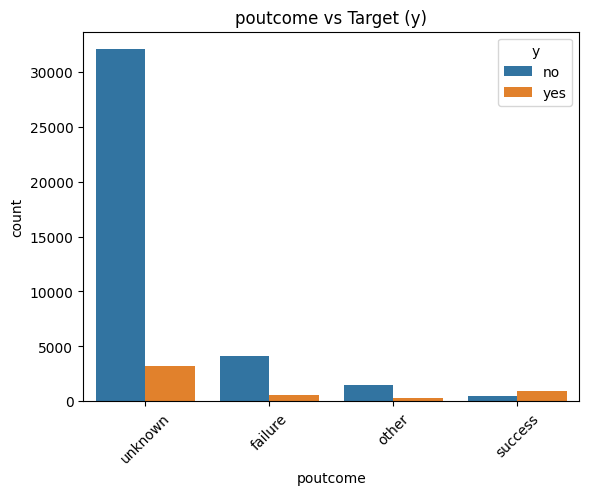

In [18]:
from scipy.stats import chi2_contingency
import seaborn as sns
import matplotlib.pyplot as plt

# Re-select categorical columns after dropping 'contact'
categorical_columns = df_cleaned.select_dtypes(include=['object']).columns

# Loop through each categorical column
for col in categorical_columns:
    if col != 'y':  # Skip the target column itself
        print(f"Analyzing relationship between '{col}' and 'y'...")

        # Cross-tabulation
        crosstab = pd.crosstab(df_cleaned[col], df_cleaned['y'])
        print(crosstab)

        # Perform Chi-Square Test
        chi2, p, dof, expected = chi2_contingency(crosstab)
        print(f"Chi-Square Statistic = {chi2}, p-value = {p}\n")

        # Visualization: Bar plot
        sns.countplot(x=col, hue='y', data=df_cleaned)
        plt.title(f"{col} vs Target (y)")
        plt.xticks(rotation=45)
        plt.show()

Analyzing relationship between 'age' and 'y'...


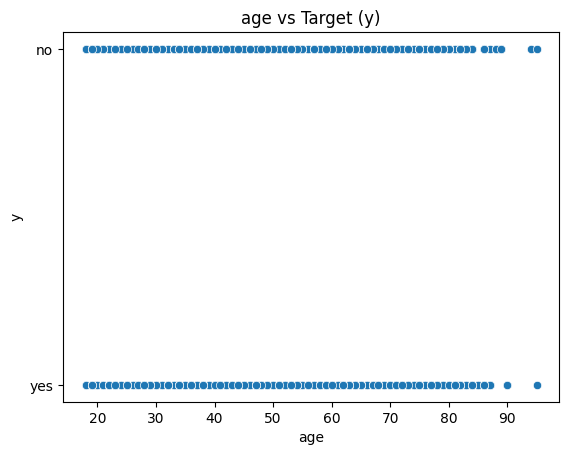

Analyzing relationship between 'balance' and 'y'...


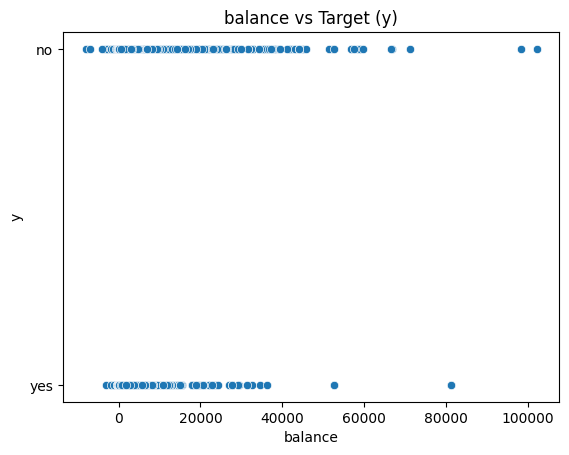

Analyzing relationship between 'day_of_week' and 'y'...


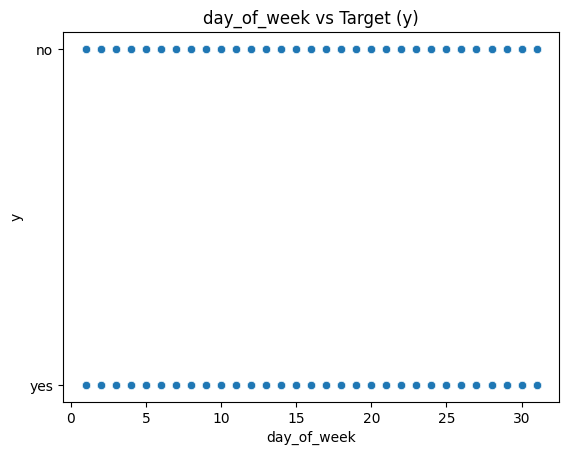

Analyzing relationship between 'duration' and 'y'...


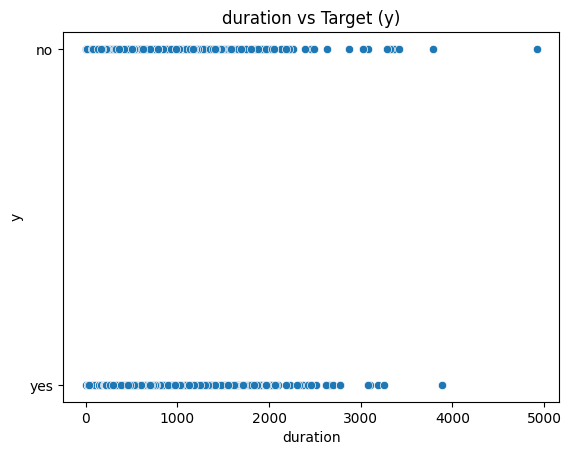

Analyzing relationship between 'campaign' and 'y'...


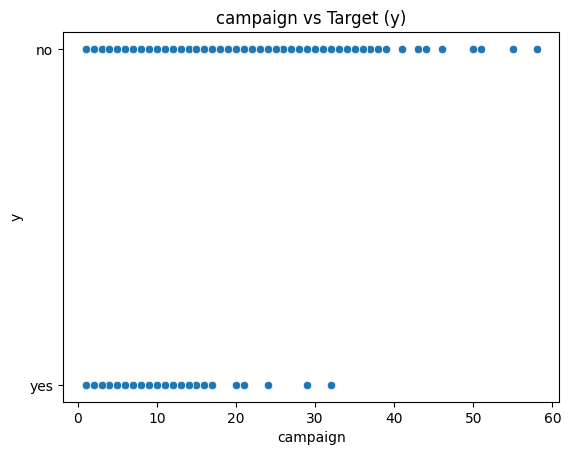

Analyzing relationship between 'pdays' and 'y'...


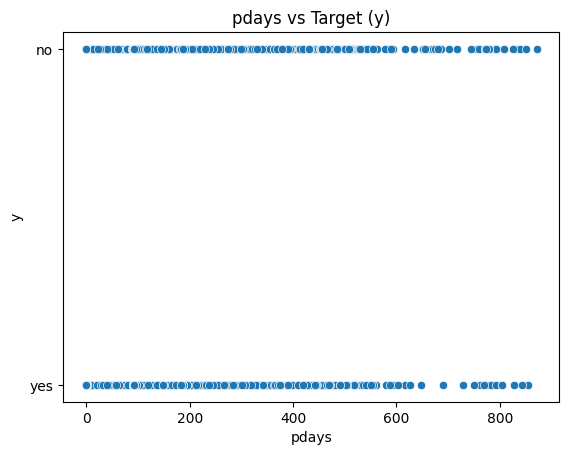

Analyzing relationship between 'previous' and 'y'...


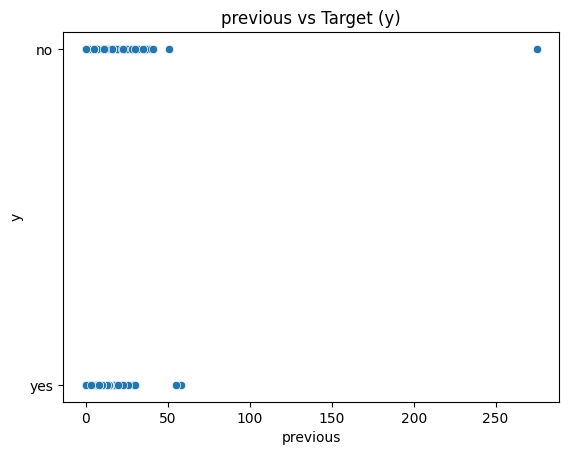

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

# Loop through each numerical column
for col in numerical_columns:
    print(f"Analyzing relationship between '{col}' and 'y'...")

    # Scatter plot
    sns.scatterplot(x=col, y='y', data=df_cleaned)
    plt.title(f"{col} vs Target (y)")
    plt.xlabel(col)
    plt.ylabel("y")
    plt.show()


In [20]:
df_cleaned = df_cleaned.drop(columns=['day_of_week'])
print(df_cleaned)

       age           job   marital  education default  balance housing loan  \
0       58    management   married   tertiary      no     2143     yes   no   
1       44    technician    single  secondary      no       29     yes   no   
2       33  entrepreneur   married  secondary      no        2     yes  yes   
5       35    management   married   tertiary      no      231     yes   no   
6       28    management    single   tertiary      no      447     yes  yes   
...    ...           ...       ...        ...     ...      ...     ...  ...   
45206   51    technician   married   tertiary      no      825      no   no   
45207   71       retired  divorced    primary      no     1729      no   no   
45208   72       retired   married  secondary      no     5715      no   no   
45209   57   blue-collar   married  secondary      no      668      no   no   
45210   37  entrepreneur   married  secondary      no     2971      no   no   

      month  duration  campaign  pdays  previous po

In [21]:
df_cleaned['y'] = y
print(df_cleaned)

       age           job   marital  education default  balance housing loan  \
0       58    management   married   tertiary      no     2143     yes   no   
1       44    technician    single  secondary      no       29     yes   no   
2       33  entrepreneur   married  secondary      no        2     yes  yes   
5       35    management   married   tertiary      no      231     yes   no   
6       28    management    single   tertiary      no      447     yes  yes   
...    ...           ...       ...        ...     ...      ...     ...  ...   
45206   51    technician   married   tertiary      no      825      no   no   
45207   71       retired  divorced    primary      no     1729      no   no   
45208   72       retired   married  secondary      no     5715      no   no   
45209   57   blue-collar   married  secondary      no      668      no   no   
45210   37  entrepreneur   married  secondary      no     2971      no   no   

      month  duration  campaign  pdays  previous po

In [22]:
df_cleaned.to_csv("cleaned_bank.csv", index=False)


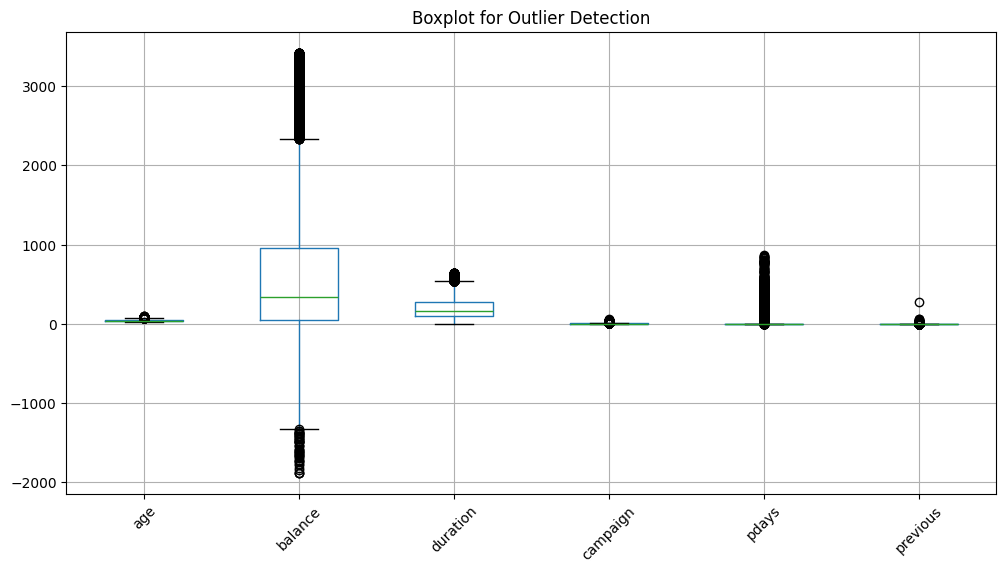

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select numerical columns
numerical_columns = df_cleaned.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Create boxplots for all numerical columns
plt.figure(figsize=(12, 6))
df_cleaned[numerical_columns].boxplot()
plt.xticks(rotation=45)
plt.title("Boxplot for Outlier Detection")
plt.show()


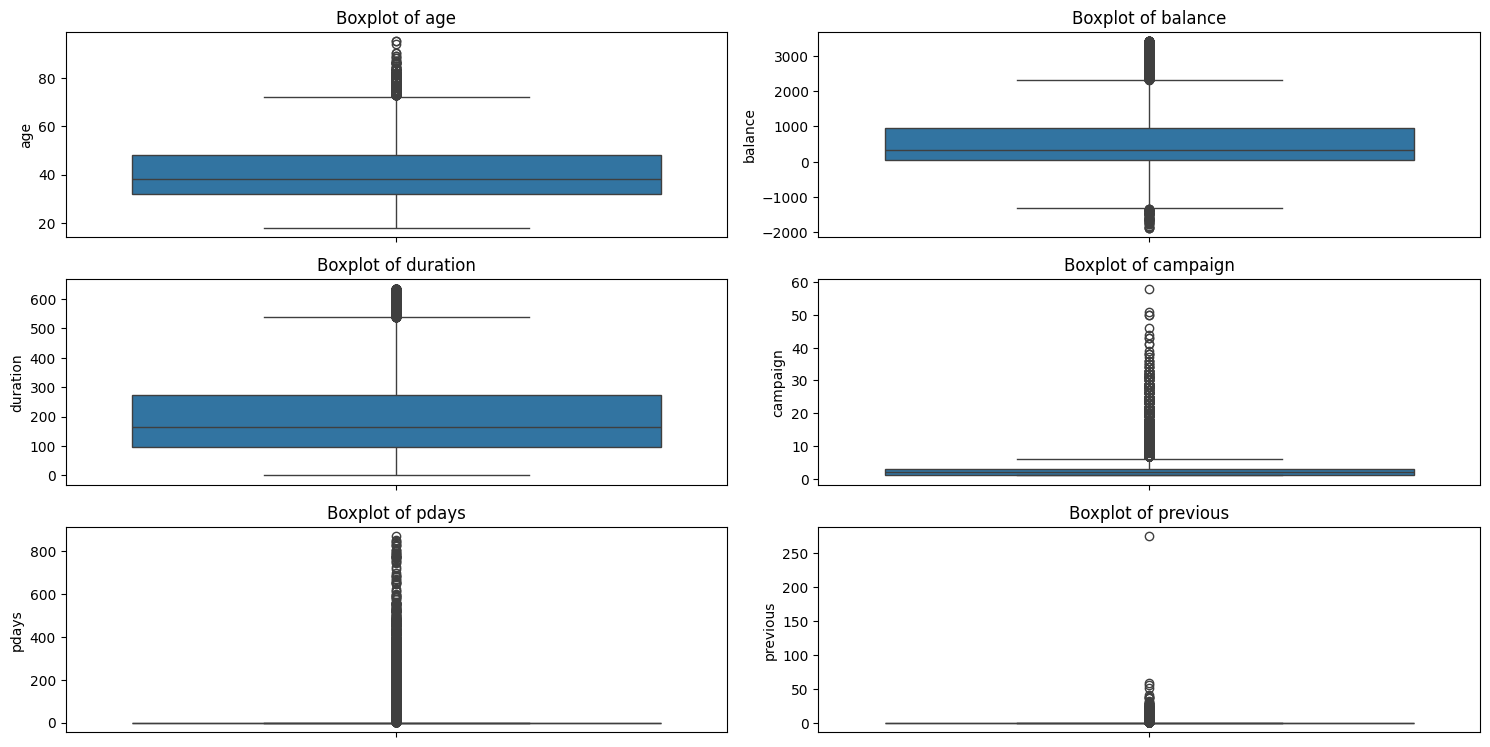

In [49]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select numerical columns
numerical_columns = df_cleaned.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Set figure size
plt.figure(figsize=(15, 10))

# Loop through each numerical column and plot a boxplot
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(len(numerical_columns) // 2 + 1, 2, i)  # Arrange plots in 2 columns
    sns.boxplot(y=df_cleaned[col])
    plt.title(f"Boxplot of {col}")

# Adjust layout
plt.tight_layout()
plt.show()


In [51]:
import pandas as pd

# Define function to remove outliers using IQR
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)  # First quartile (25%)
    Q3 = df[column].quantile(0.75)  # Third quartile (75%)
    IQR = Q3 - Q1  # Interquartile range

    # Define lower and upper bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Remove outliers
    df_filtered = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df_filtered

# Remove outliers from balance and duration
df_cleaned = remove_outliers_iqr(df_cleaned, 'balance')
df_cleaned = remove_outliers_iqr(df_cleaned, 'duration')

# Print new shape of the dataset
print(f"New dataset shape after removing outliers: {df_cleaned.shape}")


New dataset shape after removing outliers: (32497, 15)


In [57]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

# Separate categorical and numerical features
categorical_columns = df_cleaned.select_dtypes(include=['object']).columns.tolist()
numerical_columns = df_cleaned.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Remove the target variable 'y' from the categorical columns if it is there.
if 'y' in categorical_columns:
    categorical_columns.remove('y')

# Apply One-Hot Encoding to categorical columns
df_encoded = pd.get_dummies(df_cleaned, columns=categorical_columns, drop_first=True)

# Split into features (X) and target variable (y)
X = df_encoded.drop(columns=['y'])  # Features
y = df_encoded['y']  # Target

# Split data into training (80%) and testing (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display new feature names after One-Hot Encoding
print("New Features after One-Hot Encoding:")
print(X_train.columns)
print(X_train.shape,"++++++++++++++++++")

New Features after One-Hot Encoding:
Index(['age', 'balance', 'duration', 'campaign', 'pdays', 'previous',
       'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'marital_married',
       'marital_single', 'education_secondary', 'education_tertiary',
       'default_yes', 'housing_yes', 'loan_yes', 'month_aug', 'month_dec',
       'month_feb', 'month_jan', 'month_jul', 'month_jun', 'month_mar',
       'month_may', 'month_nov', 'month_oct', 'month_sep', 'poutcome_other',
       'poutcome_success', 'poutcome_unknown'],
      dtype='object')
(25997, 37) ++++++++++++++++++


In [24]:
print("**************** X train *****************")
print(X_train)
print("**************** y train *****************")
print(y_train)

**************** X train *****************
       age  balance  duration  campaign  pdays  previous  job_blue-collar  \
17202   35     5613       699         3     -1         0            False   
38686   27     1417       143         2    343         3            False   
9463    46     2899        40         1     -1         0            False   
14659   35      300       555         2     -1         0            False   
19508   52      741        63         2     -1         0            False   
...    ...      ...       ...       ...    ...       ...              ...   
6588    49      181       230         8     -1         0            False   
11953   37     1483        32         9     -1         0            False   
39815   46     2087       111         1    119         4            False   
946     35      528       274         2     -1         0            False   
16639   28      204        38         1     -1         0            False   

       job_entrepreneur  job_hou

In [48]:
# import seaborn as sns
# import matplotlib.pyplot as plt

# # Select numerical columns
# numerical_columns = df_cleaned.select_dtypes(include=['int64', 'float64']).columns.tolist()

# # Create boxplots for all numerical columns
# plt.figure(figsize=(12, 6))
# df_cleaned[numerical_columns].boxplot()
# plt.xticks(rotation=45)
# plt.title("Boxplot for Outlier Detection")
# plt.show()


In [50]:
# import seaborn as sns
# import matplotlib.pyplot as plt

# # Select numerical columns
# numerical_columns = df_cleaned.select_dtypes(include=['int64', 'float64']).columns.tolist()

# # Set figure size
# plt.figure(figsize=(15, 10))

# # Loop through each numerical column and plot a boxplot
# for i, col in enumerate(numerical_columns, 1):
#     plt.subplot(len(numerical_columns) // 2 + 1, 2, i)  # Arrange plots in 2 columns
#     sns.boxplot(y=df_cleaned[col])
#     plt.title(f"Boxplot of {col}")

# # Adjust layout
# plt.tight_layout()
# plt.show()


In [59]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report


# Train the model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict on test data
y_pred = model.predict(X_test)

# Check accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")

# Evaluate Random Forest
print("Random Forest Results:")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print("Classification Report:")
print(classification_report(y_test, y_pred))


Model Accuracy: 0.94
Random Forest Results:
Accuracy: 0.9357
Classification Report:
              precision    recall  f1-score   support

          no       0.94      0.99      0.97      6012
         yes       0.73      0.23      0.35       488

    accuracy                           0.94      6500
   macro avg       0.83      0.61      0.66      6500
weighted avg       0.92      0.94      0.92      6500



/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [60]:
# Logistic Regression gives coefficients that show which features (columns) are most important in predicting y.
# Get feature importance (Logistic Regression coefficients)
importance = pd.DataFrame({"Feature": X.columns, "Coefficient": model.coef_[0]})
importance = importance.sort_values(by="Coefficient", ascending=False)

# Print top features
print("Top Features Influencing Subscription:")
print(importance.head(10))


Top Features Influencing Subscription:
             Feature  Coefficient
35  poutcome_success     1.362581
29         month_mar     0.487722
10       job_retired     0.479979
32         month_oct     0.366980
33         month_sep     0.342863
13       job_student     0.167415
25         month_feb     0.133567
24         month_dec     0.110571
15    job_unemployed     0.018571
2           duration     0.006899


In [62]:
# For any given customer, you can predict their probability of subscribing:
# Get probabilities
y_prob = model.predict_proba(X_test)[:, 1]  # Probability of subscribing

# Add to DataFrame
test_results = X_test.copy()
test_results['Actual_y'] = y_test
test_results['Predicted_Prob'] = y_prob

# Show top customers most likely to subscribe
print(test_results.sort_values(by='Predicted_Prob', ascending=False).head(10))


       age  balance  duration  campaign  pdays  previous  job_blue-collar  \
43135   25      469       524         1    187         2            False   
44786   68     2027       404         2     91         4            False   
41920   55      309       467         2    184         1            False   
43047   23     1234       379         1     91         1            False   
34018   26      255       457         1     80         1            False   
44436   29      437       504         1     92         1            False   
42936   22      216       363         1    187         1            False   
44418   35      415       462         1     92         4            False   
44973   67      203       405         1    266         2            False   
45112   24     1234       280         2     97         3            False   

       job_entrepreneur  job_housemaid  job_management  ...  month_mar  \
43135             False          False           False  ...      False   
4478

In [35]:
# from scipy.stats import zscore

# # Compute Z-scores
# z_scores = zscore(df_cleaned[numerical_columns])

# # Find outliers where Z > 3
# outliers = (z_scores > 3) | (z_scores < -3)
# outlier_counts = outliers.sum()

# # Print number of outliers per column
# print("Number of Outliers in Each Column:")
# print(outlier_counts)


In [36]:
# Q1 = df_cleaned[numerical_columns].quantile(0.25)  # First quartile (25th percentile)
# Q3 = df_cleaned[numerical_columns].quantile(0.75)  # Third quartile (75th percentile)
# IQR = Q3 - Q1  # Interquartile range

# # Find outliers
# outliers = (df_cleaned[numerical_columns] < (Q1 - 1.5 * IQR)) | (df_cleaned[numerical_columns] > (Q3 + 1.5 * IQR))

# # Count outliers in each column
# print("Number of Outliers per Column:")
# print(outliers.sum())


In [37]:
# df_no_outliers = df_cleaned[(z_scores < 3).all(axis=1)]
# print("Shape before removing outliers:", df_cleaned.shape)
# print("Shape after removing outliers:", df_no_outliers.shape)

# from sklearn.ensemble import RandomForestClassifier

# model = RandomForestClassifier()
# model.fit(X_train, y_train)


In [55]:
# import pandas as pd

# # Define function to remove outliers using IQR
# def remove_outliers_iqr(df, column):
#     Q1 = df[column].quantile(0.25)  # First quartile (25%)
#     Q3 = df[column].quantile(0.75)  # Third quartile (75%)
#     IQR = Q3 - Q1  # Interquartile range

#     # Define lower and upper bounds
#     lower_bound = Q1 - 1.5 * IQR
#     upper_bound = Q3 + 1.5 * IQR

#     # Remove outliers
#     df_filtered = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
#     return df_filtered

# # Remove outliers from balance and duration
# df_cleaned = remove_outliers_iqr(df_cleaned, 'balance')
# df_cleaned = remove_outliers_iqr(df_cleaned, 'duration')

# # Print new shape of the dataset
# print(f"New dataset shape after removing outliers: {df_cleaned.shape}")


In [54]:
# X = df_cleaned.drop(columns=['y'])  # Features
# y = df_cleaned['y']  # Target

# # Split data into training (80%) and testing (20%)
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# print("**************** X train *****************")
# print(X_train)
# print("**************** y train *****************")
# print(y_train)

In [1]:
# from sklearn.linear_model import LogisticRegression
# from sklearn.metrics import accuracy_score,classification_report


# # Train the model
# model = LogisticRegression()
# model.fit(X_train, y_train)

# # Predict on test data
# y_pred = model.predict(X_test)

# # Check accuracy
# accuracy = accuracy_score(y_test, y_pred)
# print(f"Model Accuracy: {accuracy:.2f}")

# # Evaluate Random Forest
# print("Random Forest Results:")
# print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
# print("Classification Report:")
# print(classification_report(y_test, y_pred))


In [63]:
#  from sklearn.model_selection import train_test_split

# # Split the data into training and testing sets (80% train, 20% test)
# X_train, X_test, y_train, y_test = train_test_split(
#     df_cleaned.drop(columns=['y']),  # Features
#     df_cleaned['y'],                # Target
#     test_size=0.2,                  # 20% test data
#     random_state=42                 # For reproducibility
# )

# print(f"Training data shape: {X_train.shape}")
# print(f"Testing data shape: {X_test.shape}")


In [2]:
# categorical_columns = X_train.select_dtypes(include=['object']).columns.tolist()
# print("Categorical Columns:", categorical_columns)


In [3]:
# from sklearn.preprocessing import LabelEncoder

# # Initialize Label Encoder
# encoder = LabelEncoder()

# # Encode categorical columns for both train and test
# for col in categorical_columns:
#     X_train[col] = encoder.fit_transform(X_train[col])
#     X_test[col] = encoder.transform(X_test[col])

# print("Training Data after Label Encoding:")
# print(X_train.head())

# print("\nTesting Data after Label Encoding:")
# print(X_test.head())

# # y_train[col] = encoder.fit_transform(y_train[col])
# # y_test[col] = encoder.transform(y_test[col])



In [4]:
# print(y_train.head)

In [5]:
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.metrics import accuracy_score, classification_report

# # Train the Random Forest model
# rf_model = RandomForestClassifier(random_state=42, n_estimators=100)
# rf_model.fit(X_train, y_train)

# # Predict on the test set
# y_pred_rf = rf_model.predict(X_test)

# # Evaluate Random Forest
# print("Random Forest Results:")
# print(f"Accuracy: {accuracy_score(y_test, y_pred_rf):.4f}")
# print("Classification Report:")
# print(classification_report(y_test, y_pred_rf))


In [6]:
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.metrics import accuracy_score, classification_report

# # Train the Random Forest model
# rf_model = RandomForestClassifier(
#     n_estimators=300,
#     max_depth=20,
#     min_samples_split=5,
#     min_samples_leaf=2,
#     class_weight='balanced',
#     random_state=42
# )
# rf_model.fit(X_train, y_train)

# # Predict on the test set
# y_pred_rf = rf_model.predict(X_test)

# # Evaluate Random Forest
# print("Random Forest Results:")
# print(f"Accuracy: {accuracy_score(y_test, y_pred_rf):.4f}")
# print("Classification Report:")
# print(classification_report(y_test, y_pred_rf))

In [7]:
# from sklearn.model_selection import GridSearchCV
# from sklearn.ensemble import RandomForestClassifier

# # Define parameter grid
# param_grid = {
#     'n_estimators': [100, 200, 300],         # Number of trees
#     'max_depth': [None, 10, 20, 30],        # Maximum depth of trees
#     'min_samples_split': [2, 5, 10],        # Minimum samples to split a node
#     'min_samples_leaf': [1, 2, 5],          # Minimum samples in a leaf node
#     'class_weight': ['balanced', None]      # Class weighting strategies
# }

# # Initialize Random Forest model
# rf_model = RandomForestClassifier(random_state=42)

# # Perform Grid Search
# grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=3, scoring='accuracy', n_jobs=-1)
# grid_search.fit(X_train, y_train)

# # Print best parameters and best accuracy
# print(f"Best Parameters: {grid_search.best_params_}")
# print(f"Best Cross-Validation Accuracy: {grid_search.best_score_:.4f}")

# # Predict on the test set using the best model
# best_rf_model = grid_search.best_estimator_
# y_pred_rf = best_rf_model.predict(X_test)

# # Evaluate the fine-tuned Random Forest
# print("Fine-Tuned Random Forest Results:")
# print(f"Accuracy: {accuracy_score(y_test, y_pred_rf):.4f}")
# print("Classification Report:")
# print(classification_report(y_test, y_pred_rf))


In [8]:
# print(y_train.head)

In [9]:
# from sklearn.neural_network import MLPClassifier
# from sklearn.metrics import accuracy_score, classification_report

# # Initialize the Neural Network model
# nn_model = MLPClassifier(hidden_layer_sizes=(100, 50),  # Two hidden layers with 100 and 50 neurons
#                           activation='relu',            # ReLU activation function
#                           solver='adam',                # Adam optimizer
#                           max_iter=300,                 # Maximum number of iterations
#                           random_state=42)              # For reproducibility

# # Train the Neural Network
# print("Training the Neural Network...")
# nn_model.fit(X_train, y_train)

# # Predict on the test set
# y_pred_nn = nn_model.predict(X_test)

# # Evaluate the model
# print("Neural Network Results:")
# print(f"Accuracy: {accuracy_score(y_test, y_pred_nn):.4f}")
# print("Classification Report:")
# print(classification_report(y_test, y_pred_nn))


In [10]:
# from sklearn.model_selection import GridSearchCV
# from sklearn.neural_network import MLPClassifier

# # Define parameter grid
# param_grid = {
#     'hidden_layer_sizes': [(100,), (128, 64), (100, 50)],
#     'activation': ['relu', 'tanh', 'logistic'],
#     'solver': ['adam', 'sgd'],
#     'learning_rate_init': [0.001, 0.01, 0.0001],
#     'alpha': [0.0001, 0.001, 0.01],
# }

# # Initialize model
# nn_model = MLPClassifier(max_iter=300, random_state=42)

# # GridSearchCV
# grid_search = GridSearchCV(estimator=nn_model, param_grid=param_grid, cv=3, scoring='accuracy', n_jobs=-1)
# grid_search.fit(X_train, y_train)

# # Print best parameters and accuracy
# print(f"Best Parameters: {grid_search.best_params_}")
# print(f"Best Cross-Validation Accuracy: {grid_search.best_score_:.4f}")


In [11]:
# from sklearn.neural_network import MLPClassifier
# from sklearn.metrics import accuracy_score, classification_report

# # Initialize the Neural Network model
# nn_model = MLPClassifier(hidden_layer_sizes=(128, 64),  # Two hidden layers with 100 and 50 neurons
#                           activation='logistic',            # ReLU activation function
#                           solver='adam',                # Adam optimizer
#                           learning_rate_init=0.0001,                 # Maximum number of iterations
#                           random_state=42,
#                           alpha=0.01)              # For reproducibility

# # Train the Neural Network
# print("Training the Neural Network...")
# nn_model.fit(X_train, y_train)

# # Predict on the test set
# y_pred_nn = nn_model.predict(X_test)

# # Evaluate the model
# print("Neural Network Results:")
# print(f"Accuracy: {accuracy_score(y_test, y_pred_nn):.4f}")
# print("Classification Report:")
# print(classification_report(y_test, y_pred_nn))